**INITIALIZATION:**
- I use these three lines of code on top of my each notebooks because it will help to prevent any problems while reloading the same project. And the third line of code helps to make visualization within the notebook.

In [1]:
#@ INITIALIZATION: 
%reload_ext autoreload
%autoreload 2
%matplotlib inline

**LIBRARIES AND DEPENDENCIES:**
- I have downloaded all the libraries and dependencies required for the project in one particular cell.

In [3]:
#@ INSTALLING DEPENDENCIES: UNCOMMENT BELOW: 
# !pip install -Uqq fastbook
# import fastbook
# fastbook.setup_book()

In [4]:
#@ DOWNLOADING LIBRARIES AND DEPENDENCIES: 
from fastbook import *                                  # Getting all the Libraries. 
from fastai.callback.fp16 import *
from fastai.vision.all import *                         # Getting all the Libraries.

**GETTING THE DATASET:**
- I will download a sample of **MNIST**.

In [6]:
#@ GETTING THE DATA: 
path = untar_data(URLs.MNIST_SAMPLE)                    # Path to the Dataset. 
path.ls()                                               # Inspecting Items.

(#3) [Path('/root/.fastai/data/mnist_sample/labels.csv'),Path('/root/.fastai/data/mnist_sample/valid'),Path('/root/.fastai/data/mnist_sample/train')]

**FEATURE ENGINEERING:**
- **Feature Engineering** is the process of creating a new transformations of the input data in order to make it easier to model. 

In [7]:
#@ CREATING A MATRIX: AN EXAMPLE: 
top_edge = tensor([[-1, -1, -1], 
                   [ 0,  0,  0], 
                   [ 1,  1,  1]]).float()               # Initializing a Kernel. 

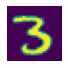

In [8]:
#@ GETTING AN IMAGE: 
im3 = Image.open(path/"train"/"3"/"12.png")             # Getting an Image. 
show_image(im3);                                        # Inspecting the Image. 

In [9]:
#@ WORKING WITH IMAGE: 
im3_t = tensor(im3)                                      # Converting into Tensor. 
print(im3_t[0:3, 0:3] * top_edge)                        # Initializing Multiplications. 
print((im3_t[0:3, 0:3] * top_edge).sum())                # Getting Sum of Tensors. 

tensor([[-0., -0., -0.],
        [0., 0., 0.],
        [0., 0., 0.]])
tensor(0.)


**Note:**
- It presents that all the pixels in top left corner are white. I will pick a couple of spots now. 

In [10]:
#@ INSPECTING PIXELS OF IMAGES: 
df = pd.DataFrame(im3_t[:10, :20])                        # Initializing a DataFrame. 
df.style.set_properties(
    **{"font-size":"6pt"}).background_gradient("Greys")   # Inspecting Pixels. 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,12,99,91,142,155,246,182,155,155,155,155,131,52,0,0,0,0
6,0,0,0,138,254,254,254,254,254,254,254,254,254,254,254,252,210,122,33,0
7,0,0,0,220,254,254,254,235,189,189,189,189,150,189,205,254,254,254,75,0
8,0,0,0,35,74,35,35,25,0,0,0,0,0,0,13,224,254,254,153,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,90,254,254,247,53,0


In [11]:
#@ GETTING MULTIPLICATION: 
print((im3_t[4:7, 6:9]*top_edge).sum())                    # Inspecting Multiplication. 
print((im3_t[7:10, 17:20]*top_edge).sum())                 # Inspecting Multiplication. 

tensor(762.)
tensor(-29.)


In [12]:
#@ CREATING A FUNCTION: 
def apply_kernel(row, col, kernel):                        # Defining a Function. 
    return (im3_t[row-1:row+2,col-1:col+2]*kernel).sum()   # Initializing Multiplication. 
apply_kernel(5, 7, top_edge)                               # Implementation. 

tensor(762.)

**CONVOLUTIONAL KERNEL:**

In [13]:
#@ INITIALIZING GRID OF COORDINATES: NESTED LIST COMPREHENSIONS: 
[[(i, j) for j in range(1,5)] for i in range(1,5)] 

[[(1, 1), (1, 2), (1, 3), (1, 4)],
 [(2, 1), (2, 2), (2, 3), (2, 4)],
 [(3, 1), (3, 2), (3, 3), (3, 4)],
 [(4, 1), (4, 2), (4, 3), (4, 4)]]

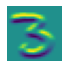

In [17]:
#@ IMPLEMENTATION OF KERNEL: TOP EDGES: 
rng = range(1, 27)                                               # Initialization. 
top_edge3 = tensor([[apply_kernel(i,j,top_edge
                                  ) for j in rng] for i in rng]) # Implementation of Function. 
show_image(top_edge3);                                           # Inspection. 

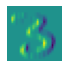

In [19]:
#@ IMPLEMENTATION OF KERNEL: LEFT EDGES:
left_edge = tensor([[-1, 1, 0], 
                   [-1, 1, 0], 
                   [-1, 1, 0]]).float()                          # Initializing a Kernel. 
left_edge3 =tensor([[apply_kernel(i,j,left_edge
                                  ) for j in rng] for i in rng]) # Implementation of Function. 
show_image(left_edge3);                                          # Inspection. 